In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
covid = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

In [3]:
covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,04/07/2020,4,7,2020,302,12,Afghanistan,AF,AFG,38041757.0,Asia
1,03/07/2020,3,7,2020,186,33,Afghanistan,AF,AFG,38041757.0,Asia
2,02/07/2020,2,7,2020,319,28,Afghanistan,AF,AFG,38041757.0,Asia
3,01/07/2020,1,7,2020,279,13,Afghanistan,AF,AFG,38041757.0,Asia
4,30/06/2020,30,6,2020,271,12,Afghanistan,AF,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
27617,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
27618,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa
27619,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
27620,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa


In [4]:
covid.to_csv('covid_data.csv')

In [5]:
covid.drop("countryterritoryCode",axis=1,inplace=True)
covid.drop("day",axis=1,inplace=True)
covid.drop("month",axis=1,inplace=True)
covid.drop("year",axis=1,inplace=True)
covid.drop("popData2019",axis=1,inplace=True)

In [6]:
covid.drop("geoId",axis=1,inplace=True)
covid

,dateRep,cases,deaths,countriesAndTerritories,continentExp
0,04/07/2020,302,12,Afghanistan,Asia
1,03/07/2020,186,33,Afghanistan,Asia
2,02/07/2020,319,28,Afghanistan,Asia
3,01/07/2020,279,13,Afghanistan,Asia
4,30/06/2020,271,12,Afghanistan,Asia
...,...,...,...,...,...
27617,25/03/2020,0,0,Zimbabwe,Africa
27618,24/03/2020,0,1,Zimbabwe,Africa
27619,23/03/2020,0,0,Zimbabwe,Africa
27620,22/03/2020,1,0,Zimbabwe,Africa


In [7]:
covid.rename(columns={'dateRep':'date','countriesAndTerritories':'country', 'continentExp':'continent'}, inplace=True)

In [8]:
covid

,date,cases,deaths,country,continent
0,04/07/2020,302,12,Afghanistan,Asia
1,03/07/2020,186,33,Afghanistan,Asia
2,02/07/2020,319,28,Afghanistan,Asia
3,01/07/2020,279,13,Afghanistan,Asia
4,30/06/2020,271,12,Afghanistan,Asia
...,...,...,...,...,...
27617,25/03/2020,0,0,Zimbabwe,Africa
27618,24/03/2020,0,1,Zimbabwe,Africa
27619,23/03/2020,0,0,Zimbabwe,Africa
27620,22/03/2020,1,0,Zimbabwe,Africa


In [9]:
covid1 = covid.iloc[::-1]
covid1

,date,cases,deaths,country,continent
27621,21/03/2020,1,0,Zimbabwe,Africa
27620,22/03/2020,1,0,Zimbabwe,Africa
27619,23/03/2020,0,0,Zimbabwe,Africa
27618,24/03/2020,0,1,Zimbabwe,Africa
27617,25/03/2020,0,0,Zimbabwe,Africa
...,...,...,...,...,...
4,30/06/2020,271,12,Afghanistan,Asia
3,01/07/2020,279,13,Afghanistan,Asia
2,02/07/2020,319,28,Afghanistan,Asia
1,03/07/2020,186,33,Afghanistan,Asia


In [10]:
covid1.head()

,date,cases,deaths,country,continent
27621,21/03/2020,1,0,Zimbabwe,Africa
27620,22/03/2020,1,0,Zimbabwe,Africa
27619,23/03/2020,0,0,Zimbabwe,Africa
27618,24/03/2020,0,1,Zimbabwe,Africa
27617,25/03/2020,0,0,Zimbabwe,Africa


In [11]:
country_wise = covid1.groupby(["country"]).sum()
country_wise

,cases,deaths
country,,
Afghanistan,32324,819
Albania,2752,72
Algeria,15070,937
Andorra,855,52
Angola,328,18
...,...,...
Vietnam,355,0
Western_Sahara,519,1
Yemen,1240,335


In [12]:
k=country_wise.nlargest(10, ['cases']) 
k

,cases,deaths
country,,
United_States_of_America,2794321,129434
Brazil,1539081,63174
Russia,667883,9859
India,648315,18655
Peru,295599,10226
Chile,288089,6051
United_Kingdom,284276,44131
Spain,250545,28385
Mexico,245251,29843


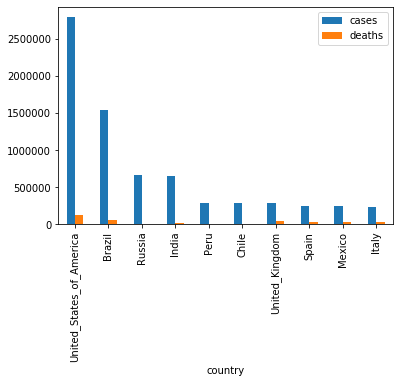

In [13]:
k.plot.bar()
plt.savefig("Top 10 countries in COVID-19 cases.png")

In [14]:
k.iloc[2]

cases     667883
deaths      9859
Name: Russia, dtype: int64

In [15]:
l=country_wise.nlargest(10, ['deaths'])
l

,cases,deaths
country,,
United_States_of_America,2794321,129434
Brazil,1539081,63174
United_Kingdom,284276,44131
Italy,241184,34833
France,166960,29893
Mexico,245251,29843
Spain,250545,28385
India,648315,18655
Iran,235429,11260


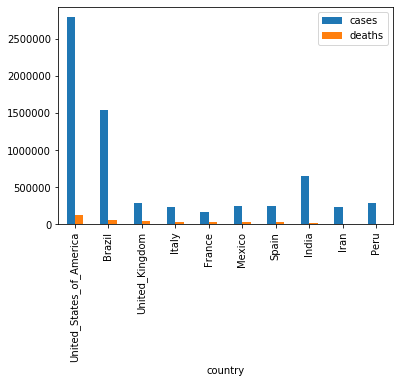

In [16]:
l.plot.bar()
plt.savefig("Top 10 countries in COVID-19 deaths.png")